<a href="https://colab.research.google.com/github/ShwetaM4414/Machine-Learning-Projects/blob/main/Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('UCI_Credit_Card.csv')

# Preprocessing

In [ ]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
#changing the name of pay_0 column to pay_1 to make the numbering correct
data.rename(columns={'PAY_0':'PAY_1'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

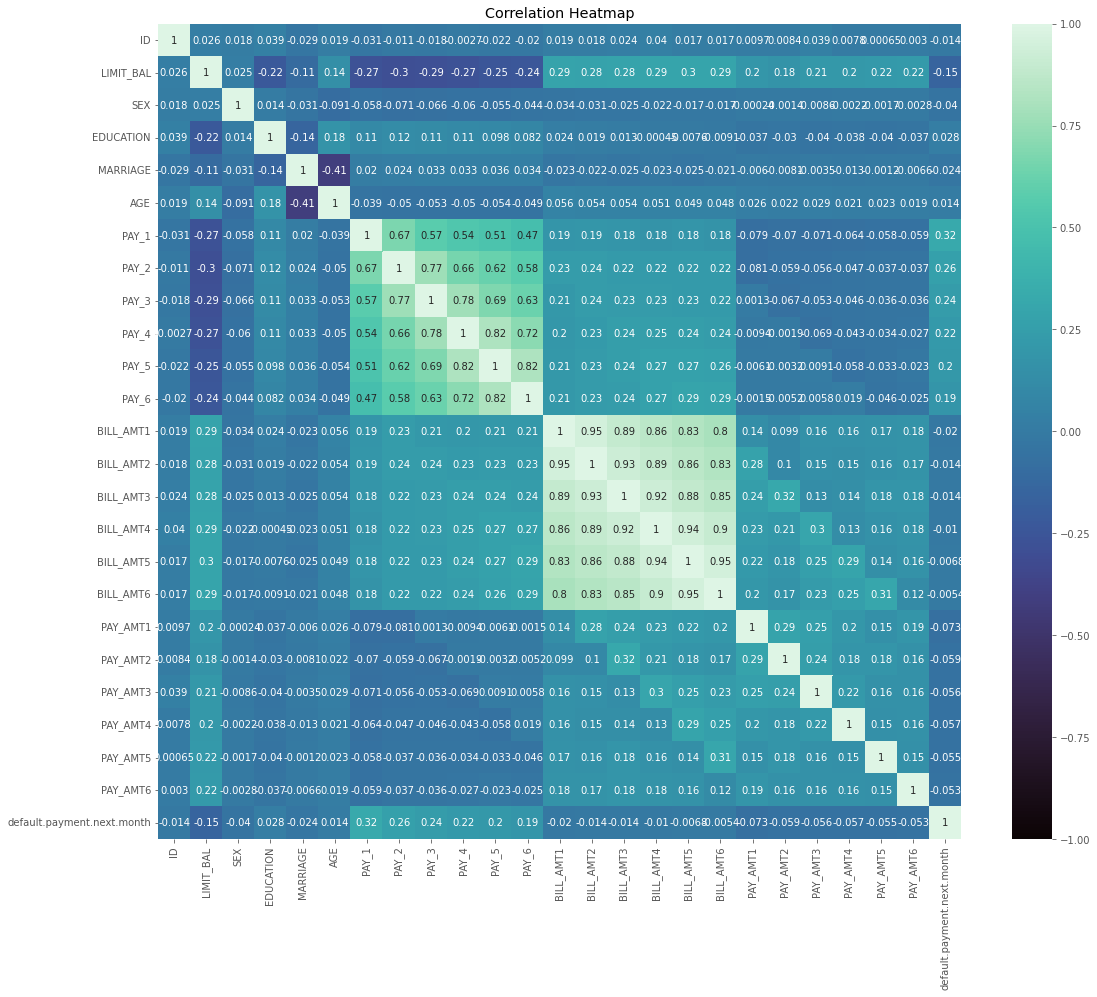

In [ ]:
corr = data.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot = True, vmin=-1.0, cmap = 'mako')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def onehot_encode(df, column_dict):
  df = df.copy()
  for column, prefix in column_dict.items():
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
  return df

In [ ]:
def preprocess_inputs(data):
  df = data.copy()

  #drop ID column
  df = df.drop('ID', axis = 1)
  df = onehot_encode(
      df,
      {
          'EDUCATION' : 'EDU',
          'MARRIAGE' : 'MAR'
      }
  )

  #split data into x and y
  y = df['default.payment.next.month'].copy()
  x = df.drop('default.payment.next.month', axis = 1).copy()

  #Scale X with a standarad scaler

  scaler = StandardScaler()
  x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

  return x, y

In [ ]:
x, y = preprocess_inputs(data)

In [ ]:
{column: len(x[column].unique()) for column in x.columns}

{'LIMIT_BAL': 81,
 'SEX': 2,
 'AGE': 56,
 'PAY_1': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2}

In [ ]:
x

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
1,-0.365981,0.810161,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
2,-0.597202,0.810161,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
3,-0.905498,0.810161,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
4,-0.905498,-1.234323,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326
29996,-0.134759,-1.234323,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29997,-1.059646,-1.234323,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,...,-0.738375,1.066900,-0.442752,-0.064163,-0.097063,-0.041266,-0.042465,-0.914261,0.937672,-0.104326
29998,-0.674276,-1.234323,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,...,-0.738375,-0.937295,2.258602,-0.064163,-0.097063,-0.041266,-0.042465,1.093780,-1.066471,-0.104326


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

# Random Forest Algorithm

In [ ]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
x_train.shape, x_test.shape

((21000, 32), (9000, 32))

In [ ]:
# let,s import random forest classifier and split the data
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 20, n_estimators = 25, min_samples_leaf = 20, )

In [ ]:
%%time
model.fit(x_train, y_train)

CPU times: user 1.47 s, sys: 2.78 ms, total: 1.47 s
Wall time: 825 ms


RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y,cv=10)

In [ ]:
score

array([0.808     , 0.81033333, 0.81366667, 0.80733333, 0.82033333,
       0.824     , 0.836     , 0.83066667, 0.825     , 0.824     ])

In [ ]:
score.mean()

0.8199333333333334

# XGBOOST Algorithm

In [ ]:
#Hyperparameter Optimization

params_xg = {
    "learning_rate"      : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"          : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight"   : [1, 3, 5, 7],
    "gamma"              : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"  : [0.3, 0.4, 0.5, 0.7]
} 

In [ ]:
#Hyperparameter Optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time = None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken : %i hours %i minutes and %s seconds.' %(thour, tmin, round(tsec, 2)))

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions = params_xg, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)

In [ ]:
from datetime import datetime 
# timing starts from this point for "start_time" variable
start_time = timer(None)
random_search.fit(x, y)
# timing ends here for "start_time" variable
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken : 0 hours 2 minutes and 23.94 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4,
              min_child_weight=5)

In [ ]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, x, y,cv=10)

In [ ]:
score

array([0.809     , 0.80866667, 0.81966667, 0.80566667, 0.819     ,
       0.828     , 0.83566667, 0.832     , 0.828     , 0.824     ])

In [ ]:
score.mean()

0.8209666666666667

# SVM Algorithm

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [ ]:
svc_clf = SVC(kernel="rbf",verbose=True)
svc_clf.fit(x_train,y_train)

[LibSVM]

SVC(verbose=True)

In [ ]:
y_test_pred = svc_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_accuracy = accuracy_score(y_test, y_test_pred)
model_accuracy

0.8186666666666667